In [1]:
%reset
# 일부 이미지 분리(총 4000개)

import os, shutil

original_dataset_dir = './data/cat_dog/train'

## directory 생성 ##

base_dir = 'data/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

## file 복사 ##

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

Once deleted, variables cannot be recovered. Proceed (y/[n])? ㅛ
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# Keras가 제공하는 ImageDataGenerator 사용에 대해서 알아보아요!

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './data/cat_dog_small/train'    # cats folder, dogs folder
valid_dir = './data/cat_dog_small/validation'

# ImageDataGenerator를 생성해요!
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),  # resize
    batch_size=20,          # 한번에 20장씩 들고옴
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))   # 3은 R,G,B 3원색을 뜻함

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))  

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu')) 

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))  

model.add(MaxPooling2D(pool_size=(2,2)))

### feature extraction ###
model.add(Flatten())  # 이미지 3차원을 1차원으로 변경

model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)      

In [5]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,   # 2000개 이미지, 20개씩 뽑아내면 100번 뽑아야 다 뽑을수 있음
                    steps_per_epoch=100,   # 한 에폭당 몇 스텝이냐
                    epochs=30,
                    validation_data=validation_generator,  # 1000개 이미지, 20개씩 뽑아내면 50번 뽑아야 가능
                    validation_steps=50)

model.save('./data/cats_dogs_small_cnn_model.h5')


2022-04-20 10:06:57.454131: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 10:06:57.472547: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/30
100/100 [==============================] - 181s 2s/step - loss: 0.6945 - accuracy: 0.5229 - val_loss: 0.6826 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 170s 2s/step - loss: 0.6568 - accuracy: 0.6112 - val_loss: 0.6262 - val_accuracy: 0.6260
Epoch 3/30
100/100 [==============================] - 181s 2s/step - loss: 0.5522 - accuracy: 0.7180 - val_loss: 0.6197 - val_accuracy: 0.6550
Epoch 4/30
100/100 [==============================] - 180s 2s/step - loss: 0.5205 - accuracy: 0.7453 - val_loss: 0.6136 - val_accuracy: 0.6680
Epoch 5/30
100/100 [==============================] - 179s 2s/step - loss: 0.4753 - accuracy: 0.7797 - val_loss: 0.5914 - val_accuracy: 0.6870
Epoch 6/30
100/100 [==============================] - 180s 2s/step - loss: 0.4258 - accuracy: 0.8127 - val_loss: 0.6238 - val_accuracy: 0.6710
Epoch 7/30
100/100 [==============================] - 181s 2s/step - loss: 0.4019 - accuracy: 0.8307 - val_loss: 0.6252 - val_accuracy: 0.6820

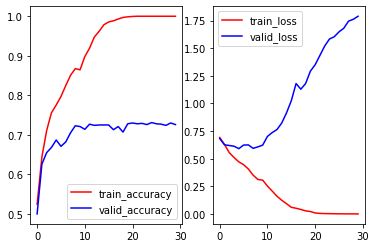

In [7]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='r', label='train_accuracy')
ax1.plot(valid_acc, color='b', label='valid_accuracy')
ax1.legend()

ax2.plot(train_loss, color='r', label='train_loss')
ax2.plot(valid_loss, color='b', label='valid_loss')
ax2.legend()

<class 'numpy.ndarray'> (150, 150, 3)
(1, 150, 150, 3)


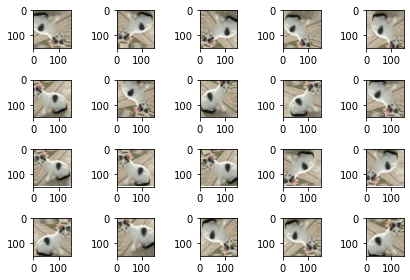

In [2]:
# Image Augmentatiion (이미지 증식)

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# train_datagen = ImageDataGenerator (rescale = 1/255)
datagen = ImageDataGenerator(rotation_range=20,  # 회전각도 20도
                             width_shift_range=0.1,     # 가로방향으로 10퍼센트 비율만큼 그림을 움직임
                             height_shift_range=0.1,     # 위아래로 50퍼센트 비율만큼 그림을 움직임
                             zoom_range=0.1,
                             horizontal_flip=True,   # 좌우반전 
                             vertical_flip=True,     # 상하반전
                             fill_mode= 'nearest')   # 근처에 있는 값으로 보정하기
                            
img = image.load_img('./data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)  # img로부터 numpy array뽑아냄
print(type(x),x.shape)

x = x.reshape((1,) + x.shape)  # 이미지의 차원을 높임
print(x.shape)

figure = plt.figure()
ax = []

for i in range(20):
    ax.append(figure.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):    # 데이터를 x로부터 가져옴, 데이터를 하나만 들고옴(batch_size)
    ax[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx == 20:
        break
        
plt.tight_layout()
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2022-04-20 13:04:11.445936: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-20 13:04:11.446200: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-20 13:04:11.446376: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

2022-04-20 13:04:12.478573: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 13:04:12.504545: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/30
100/100 [==============================] - 138s 1s/step - loss: 0.7036 - accuracy: 0.4882 - val_loss: 0.6874 - val_accuracy: 0.5610
Epoch 2/30
100/100 [==============================] - 136s 1s/step - loss: 0.6911 - accuracy: 0.5565 - val_loss: 0.6846 - val_accuracy: 0.5030
Epoch 3/30
100/100 [==============================] - 143s 1s/step - loss: 0.6736 - accuracy: 0.5753 - val_loss: 0.6535 - val_accuracy: 0.6170
Epoch 4/30
100/100 [==============================] - 143s 1s/step - loss: 0.6386 - accuracy: 0.6549 - val_loss: 0.6552 - val_accuracy: 0.6000
Epoch 5/30
100/100 [==============================] - 144s 1s/step - loss: 0.6297 - accuracy: 0.6560 - val_loss: 0.5860 - val_accuracy: 0.6780
Epoch 6/30
100/100 [==============================] - 144s 1s/step - loss: 0.5796 - accuracy: 0.6974 - val_loss: 0.5976 - val_accuracy: 0.6620
Epoch 7/30
100/100 [==============================] - 127s 1s/step - loss: 0.5675 - accuracy: 0.7211 - val_loss: 0.5453 - val_accuracy: 0.7110

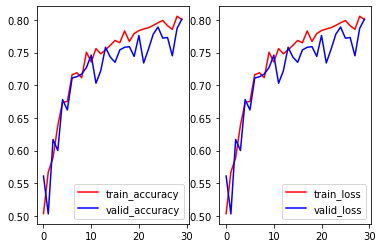

In [3]:
# 증식을 이용해서 4000개 이미지 학습

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './data/cat_dog_small/train'    # cats folder, dogs folder
valid_dir = './data/cat_dog_small/validation'

# ImageDataGenerator를 생성해요!
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20, 
                                   width_shift_range=0.1,     
                                   height_shift_range=0.1,  
                                   zoom_range=0.2,
                                   horizontal_flip=True,   
                                   fill_mode= 'nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),  # resize
    batch_size=20,          # 한번에 20장씩 들고옴
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,    # target directory
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
    
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(150,150,3)))   # 3은 R,G,B 3원색을 뜻함

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu'))  

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu')) 

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu'))  

model.add(MaxPooling2D(pool_size=(2,2)))

### feature extraction ###
model.add(Flatten())  # 이미지 3차원을 1차원으로 변경

model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=1,
                activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,   # 2000개 이미지, 20개씩 뽑아내면 100번 뽑아야 다 뽑을수 있음
                    steps_per_epoch=100,   # 한 에폭당 몇 스텝이냐
                    epochs=30,
                    validation_data=validation_generator,  # 1000개 이미지, 20개씩 뽑아내면 50번 뽑아야 가능
                    validation_steps=50)

model.save('./data/cats_dogs_small_cnn_model_augmentation.h5')

import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='r', label='train_accuracy')
ax1.plot(valid_acc, color='b', label='valid_accuracy')
ax1.legend()

ax2.plot(train_loss, color='r', label='train_loss')
ax2.plot(valid_loss, color='b', label='valid_loss')
ax2.legend()

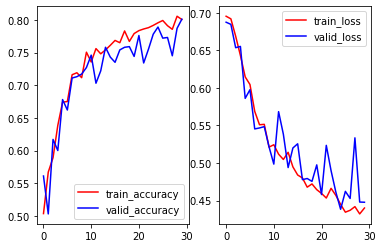

In [4]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

figure = plt.figure()
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ax1.plot(train_acc, color='r', label='train_accuracy')
ax1.plot(valid_acc, color='b', label='valid_accuracy')
ax1.legend()

ax2.plot(train_loss, color='r', label='train_loss')
ax2.plot(valid_loss, color='b', label='valid_loss')
ax2.legend()

In [6]:
# transfer learning

# keras는 전이학습을 위해서 VGG16을 제공
from tensorflow.keras.applications import VGG16

model_base = VGG16(weights='imagenet',
                   include_top=False,    # FC layer 쓸거니 말거니, imagenet을 학습시킨 FC layer을 이용할거냐는것
                   input_shape=(150,150,3))

# include_top=False로 하면 input_shape을 (224,224,3)으로 잡아야함
# 하지만 (224,224,3)으로 하면 output으로 1000이 나오므로 개와 고양이 데이터는 사용못함
# 개와 고양이는 2개로만 분류하기 떄문에!!


print(model_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
# 우리가 가지고 있는 데이터(개와 고양이)를 VGG16에 통과시켜서
# activation map을 만들거에요
# ndarray형태로 저장해야함

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = './data/cat_dog_small'
train_dir = os.path.join(base_dir, 'train')  # ./data/cat_dog_small/train
valid_dir = os.path.join(base_dir, 'validation')  
test_dir = os.path.join(base_dir, 'test')  

datagen = ImageDataGenerator(rescale=1/255)

def extraction_feature(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,))
    
    generator = datagen.flow_from_directory(
        directory,
        classes=['cats','dogs'],
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'
    )
    
    i = 0
    
    for x_data_batch, t_data_batch in generator :
        feature_batch = model_base.predict(x_data_batch)  # 20개 이미지 특성추출
        features[i*20:(i+1)*20] = feature_batch  # [20:40]
        labels[i*20:(i+1)*20] = t_data_batch 
        
        i = i + 1
        
        if i*20 >= sample_count:
            break
            
    return features, labels

train_features, train_labels = extraction_feature(train_dir, 2000)
valid_features, valid_labels = extraction_feature(valid_dir, 1000)
test_features, test_labels = extraction_feature(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# 이 activation map을 이용해서 DNN학습을 하면 될거 같아요

train_x_data = np.reshape(train_features, (2000,4*4*512))  # 2차원
train_t_data = train_labels

valid_x_data = np.reshape(valid_features, (1000,4*4*512))  # 2차원
valid_t_data = valid_labels

test_x_data = np.reshape(test_features, (1000,4*4*512))  # 2차원
test_t_data = test_labels

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Flatten(input_shape=(4*4*512,)))

model.add(Dense(units=256,
                activation='relu'))

model.add(Dropout(rate=0.5))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x_data,
                    train_t_data,
                    epochs=30,
                    batch_size=20,
                    validation_data = (valid_x_data, valid_t_data))

Epoch 1/30
100/100 [==============================] - 2s 13ms/step - loss: 0.5690 - accuracy: 0.6829 - val_loss: 0.3087 - val_accuracy: 0.8630
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2861 - accuracy: 0.8865 - val_loss: 0.2623 - val_accuracy: 0.8970
Epoch 3/30
100/100 [==============================] - 1s 13ms/step - loss: 0.2314 - accuracy: 0.9116 - val_loss: 0.2580 - val_accuracy: 0.8900
Epoch 4/30
100/100 [==============================] - 2s 21ms/step - loss: 0.1896 - accuracy: 0.9317 - val_loss: 0.2395 - val_accuracy: 0.9060
Epoch 5/30
100/100 [==============================] - 2s 19ms/step - loss: 0.1501 - accuracy: 0.9435 - val_loss: 0.2349 - val_accuracy: 0.9030
Epoch 6/30
100/100 [==============================] - 2s 22ms/step - loss: 0.1234 - accuracy: 0.9566 - val_loss: 0.2394 - val_accuracy: 0.9010
Epoch 7/30
100/100 [==============================] - 2s 21ms/step - loss: 0.1022 - accuracy: 0.9654 - val_loss: 0.2349 - val_accuracy: 0.9050